In [1]:
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Calculate the Euclidean distance between two vectors
def euclidean_distance(point1, point2):
    point2 = np.array(point2)[0:2]
    return np.linalg.norm(point1 - point2)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for index, train_row in train.iterrows():
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# kNN Algorithm
def k_nearest_neighbors(train, test, num_neighbors):
    predictions = []
    for row in test:
        output = predict_classification(train, row, num_neighbors)
        predictions.append(output)
    return(predictions)

In [12]:
#1
df = pd.read_csv('D2z.txt', sep=" ", header=None)
df.columns = ['x1', 'x2', 'y']
cols = df.columns
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
x1_test = []
x2_test = []

In [13]:
for i, vi in enumerate(np.arange(-2, 2.1, 0.1)):
        for j, vj in enumerate(np.arange(-2, 2.1, 0.1)):
            x1_test.append(vi)
            x2_test.append(vj)
x1_test = np.array(x1_test)
x2_test = np.array(x2_test)
test = np.vstack((x1_test, x2_test)).T

In [16]:
pred = np.array(k_nearest_neighbors(df, test, 1))
pred

array([1., 1., 1., ..., 0., 0., 0.])

In [17]:
test = np.append(test, pred.reshape(1681,1), 1)

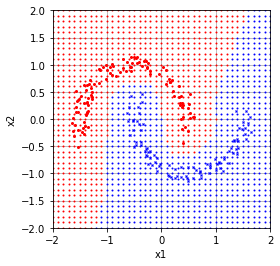

In [18]:
x1_test_pos = test[test[:, 2]==1][:, 0]
x2_test_pos = test[test[:, 2]==1][:, 1]

x1_test_neg = test[test[:, 2]==0][:, 0]
x2_test_neg = test[test[:, 2]==0][:, 1]

x1_train_pos = np.array(df[df['y'] == 1]['x1'])
x2_train_pos = np.array(df[df['y'] == 1]['x2'])
x1_train_neg = np.array(df[df['y'] == 0]['x1'])
x2_train_neg = np.array(df[df['y'] == 0]['x2'])
fig, ax = plt.subplots()
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x1_test_pos, x2_test_pos, '.', color='red', markersize=2)
plt.plot(x1_test_neg, x2_test_neg, '.', color='blue', markersize=2)
plt.plot(x1_train_pos, x2_train_pos, 'o', color='red', markersize=2)
plt.plot(x1_train_neg, x2_train_neg, 'x', color='blue', markersize=2)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
ax.set_aspect('equal')
ax.grid(True, which='both')
plt.show()

In [19]:
#2
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('emails.csv', sep=",")
# Dropping the 1st column because it contains index
df = df.drop(columns=df.columns[0])
# Creating the individual splits
fold1_train = df.iloc[:1000, :]
fold1_test = df.iloc[1000:, :]

fold2_train = df.iloc[1000:2000, :]
fold2_test = pd.concat([df.iloc[:1000, :], df.iloc[2000:, :]])

fold3_train = df.iloc[2000:3000, :]
fold3_test = fold2_test = pd.concat([df.iloc[:2000, :], df.iloc[3000:, :]])

fold4_train = df.iloc[3000:4000, :]
fold4_test = fold2_test = pd.concat([df.iloc[:3000, :], df.iloc[4000:, :]])

fold5_train = df.iloc[4000:5000, :]
fold5_test = df.iloc[:3000, :]

foldmain_train = df.iloc[:4000, :]
foldmain_test = df.iloc[4000:5000, :]

In [23]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

def gradients(X, y, y_hat):
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    X = np.array(X)
    y = np.array(y)
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)

    # Normalizing the inputs.
    #x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    #x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

In [34]:
log_acc = []
model1fold = LogisticRegression(max_iter=1000)
w, b, l = train(fold1_train.iloc[:, :-1], fold1_train.iloc[:,-1], bs=100, epochs=1000, lr=0.01)
predicted_c = predict(fold1_test.iloc[:, :-1])
print("Custom 1fold"+str(accuracy(np.array(fold1_test.iloc[:, -1]),predicted_c)))
log_acc.append(accuracy(np.array(fold1_test.iloc[:, -1]),predicted_c))


model1fold.fit(fold1_train.iloc[:, :-1], fold1_train.iloc[:,-1])
predicted_classes = model1fold.predict(fold1_test.iloc[:, :-1])

acc = accuracy_score(np.array(fold1_test.iloc[:, -1]),predicted_classes)
print("1 F Precision " + str(precision_score(np.array(fold1_test.iloc[:, -1]),predicted_classes, average='binary')))
print("1 F Recall " + str(recall_score(np.array(fold1_test.iloc[:, -1]),predicted_classes, average='binary')))

parameters = model1fold.coef_

model2fold = LogisticRegression(max_iter=1000)
model2fold.fit(fold2_train.iloc[:, :-1], fold2_train.iloc[:,-1])
predicted_classes = model2fold.predict(fold2_test.iloc[:, :-1])
acc = accuracy_score(np.array(fold2_test.iloc[:, -1]),predicted_classes)
print("SKLearn 2fold"+str(acc))
print("2 F Precision " + str(precision_score(np.array(fold2_test.iloc[:, -1]),predicted_classes, average='binary')))
print("2 F Recall " + str(recall_score(np.array(fold2_test.iloc[:, -1]),predicted_classes, average='binary')))

w, b, l = train(fold2_train.iloc[:, :-1], fold2_train.iloc[:,-1], bs=100, epochs=1000, lr=0.01)
predicted_c = predict(fold2_test.iloc[:, :-1])

print(accuracy(np.array(fold2_test.iloc[:, -1]),predicted_c))
log_acc.append(accuracy(np.array(fold2_test.iloc[:, -1]),predicted_c))

parameters = model2fold.coef_

model3fold = LogisticRegression(max_iter=1000)
model3fold.fit(fold3_train.iloc[:, :-1], fold3_train.iloc[:,-1])
predicted_classes = model3fold.predict(fold3_test.iloc[:, :-1])
acc = accuracy_score(np.array(fold3_test.iloc[:, -1]),predicted_classes)
print("SKLearn 3fold"+str(acc))
print("3 F Precision " + str(precision_score(np.array(fold3_test.iloc[:, -1]),predicted_classes, average='binary')))
print("3 F Recall " + str(recall_score(np.array(fold3_test.iloc[:, -1]),predicted_classes, average='binary')))

w, b, l = train(fold3_train.iloc[:, :-1], fold3_train.iloc[:,-1], bs=100, epochs=1000, lr=0.01)
predicted_c = predict(fold3_test.iloc[:, :-1])
print("Custom 3fold"+str(accuracy(np.array(fold3_test.iloc[:, -1]),predicted_c)))
log_acc.append(accuracy(np.array(fold3_test.iloc[:, -1]),predicted_c))
parameters = model3fold.coef_

model4fold = LogisticRegression(max_iter=1000)
model4fold.fit(fold4_train.iloc[:, :-1], fold4_train.iloc[:,-1])
predicted_classes = model4fold.predict(fold4_test.iloc[:, :-1])
acc = accuracy_score(np.array(fold4_test.iloc[:, -1]),predicted_classes)
print("SKLearn 4fold"+str(acc))
print("4 F Precision " + str(precision_score(np.array(fold4_test.iloc[:, -1]),predicted_classes, average='binary')))
print("4 F Recall " + str(recall_score(np.array(fold4_test.iloc[:, -1]),predicted_classes, average='binary')))

w, b, l = train(fold4_train.iloc[:, :-1], fold4_train.iloc[:,-1], bs=100, epochs=1000, lr=0.01)
predicted_c = predict(fold4_test.iloc[:, :-1])
print("Custom 4fold"+str(accuracy(np.array(fold4_test.iloc[:, -1]),predicted_c)))
log_acc.append(accuracy(np.array(fold4_test.iloc[:, -1]),predicted_c))
parameters = model4fold.coef_

model5fold = LogisticRegression(max_iter=1000)
model5fold.fit(fold5_train.iloc[:, :-1], fold5_train.iloc[:,-1])
predicted_classes = model5fold.predict(fold5_test.iloc[:, :-1])
acc = accuracy_score(np.array(fold5_test.iloc[:, -1]),predicted_classes)
print("SKLearn 5fold"+str(acc))
print("5 F Precision " + str(precision_score(np.array(fold5_test.iloc[:, -1]),predicted_classes, average='binary')))
print("5 F Recall " + str(recall_score(np.array(fold5_test.iloc[:, -1]),predicted_classes, average='binary')))

w, b, l = train(fold5_train.iloc[:, :-1], fold5_train.iloc[:,-1], bs=100, epochs=1000, lr=0.01)
predicted_c = predict(fold5_test.iloc[:, :-1])
print("Custom 5fold"+str(accuracy(np.array(fold5_test.iloc[:, -1]),predicted_c)))
log_acc.append(accuracy(np.array(fold5_test.iloc[:, -1]),predicted_c))
parameters = model5fold.coef_







<ipython-input-23-70831b5d95ff>:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
<ipython-input-23-70831b5d95ff>:5: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
<ipython-input-23-70831b5d95ff>:5: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


Custom 1fold0.909
1 F Precision 0.87151841868823
1 F Recall 0.8354866494401378
SKLearn 2fold0.94
2 F Precision 0.8806343906510852
2 F Recall 0.9157986111111112


<ipython-input-23-70831b5d95ff>:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
<ipython-input-23-70831b5d95ff>:5: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
<ipython-input-23-70831b5d95ff>:5: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


0.93225
SKLearn 3fold0.90875
3 F Precision 0.8160190325138779
3 F Recall 0.8855421686746988


<ipython-input-23-70831b5d95ff>:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
<ipython-input-23-70831b5d95ff>:5: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
<ipython-input-23-70831b5d95ff>:5: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


Custom 3fold0.9175
SKLearn 4fold0.9325
4 F Precision 0.8477917981072555
4 F Recall 0.9331597222222222


<ipython-input-23-70831b5d95ff>:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
<ipython-input-23-70831b5d95ff>:5: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
<ipython-input-23-70831b5d95ff>:5: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


Custom 4fold0.92075
SKLearn 5fold0.9353333333333333
5 F Precision 0.8696145124716553
5 F Recall 0.9066193853427896


<ipython-input-23-70831b5d95ff>:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
<ipython-input-23-70831b5d95ff>:5: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
<ipython-input-23-70831b5d95ff>:5: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


Custom 5fold0.929


In [26]:
avg_accuracy = []
for i in [1,3,5,7,10]:
    knn_acc = []
    var = 0
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(fold1_train.iloc[:, :-1], fold1_train.iloc[:, -1])
    y_pred = neigh.predict(fold1_test.iloc[:, :-1])
    var = var + accuracy_score(fold1_test.iloc[:, -1], y_pred)
    print("Accuracy : 1 : " + str(accuracy_score(fold1_test.iloc[:, -1], y_pred)))
    print("Precision : 1 : " + str(precision_score(fold1_test.iloc[:, -1], y_pred, average='binary')))
    print("Recall : 1 : " + str(recall_score(fold1_test.iloc[:, -1], y_pred, average='binary')))
    knn_acc.append(accuracy_score(fold1_test.iloc[:, -1], y_pred))
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(fold2_train.iloc[:, :-1], fold2_train.iloc[:, -1])
    y_pred = neigh.predict(fold2_test.iloc[:, :-1])
    var = var + accuracy_score(fold2_test.iloc[:, -1], y_pred)
    print("Accuracy : 2 : " + str(accuracy_score(fold2_test.iloc[:, -1], y_pred)))
    print("Precision : 2 : " + str(precision_score(fold2_test.iloc[:, -1], y_pred, average='binary')))
    print("Recall : 2 : " + str(recall_score(fold2_test.iloc[:, -1], y_pred, average='binary')))
    knn_acc.append(accuracy_score(fold2_test.iloc[:, -1], y_pred))

    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(fold3_train.iloc[:, :-1], fold3_train.iloc[:, -1])
    y_pred = neigh.predict(fold3_test.iloc[:, :-1])
    var = var + accuracy_score(fold3_test.iloc[:, -1], y_pred)
    print("Accuracy : 3 : " + str(accuracy_score(fold3_test.iloc[:, -1], y_pred)))
    print("Precision : 3 : " + str(precision_score(fold3_test.iloc[:, -1], y_pred, average='binary')))
    print("Recall : 3 : " + str(recall_score(fold3_test.iloc[:, -1], y_pred, average='binary')))
    knn_acc.append(accuracy_score(fold3_test.iloc[:, -1], y_pred))

    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(fold4_train.iloc[:, :-1], fold4_train.iloc[:, -1])
    y_pred = neigh.predict(fold4_test.iloc[:, :-1])
    var = var + accuracy_score(fold4_test.iloc[:, -1], y_pred)
    print("Accuracy : 4 : " + str(accuracy_score(fold4_test.iloc[:, -1], y_pred)))
    print("Precision : 4 : " + str(precision_score(fold4_test.iloc[:, -1], y_pred, average='binary')))
    print("Recall : 4 : " + str(recall_score(fold4_test.iloc[:, -1], y_pred, average='binary')))
    knn_acc.append(accuracy_score(fold4_test.iloc[:, -1], y_pred))

    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(fold5_train.iloc[:, :-1], fold5_train.iloc[:, -1])
    y_pred = neigh.predict(fold5_test.iloc[:, :-1])
    var = var + accuracy_score(fold5_test.iloc[:, -1], y_pred)
    print("Accuracy : 5 : " + str(accuracy_score(fold5_test.iloc[:, -1], y_pred)))
    print("Precision : 5 : " + str(precision_score(fold5_test.iloc[:, -1], y_pred, average='binary')))
    print("Recall : 5 : " + str(recall_score(fold5_test.iloc[:, -1], y_pred, average='binary')))
    knn_acc.append(accuracy_score(fold5_test.iloc[:, -1], y_pred))
    
    avg_accuracy.append(sum(knn_acc)/5)

Accuracy : 1 : 0.78875
Precision : 1 : 0.6276252019386107
Recall : 1 : 0.6692506459948321
Accuracy : 2 : 0.8275
Precision : 2 : 0.6661870503597123
Recall : 2 : 0.8038194444444444
Accuracy : 3 : 0.78675
Precision : 3 : 0.6075156576200418
Recall : 3 : 0.7512908777969018
Accuracy : 4 : 0.76725
Precision : 4 : 0.5714285714285714
Recall : 4 : 0.7673611111111112
Accuracy : 5 : 0.7373333333333333
Precision : 5 : 0.5266544117647058
Recall : 5 : 0.6773049645390071
Accuracy : 1 : 0.80375
Precision : 1 : 0.6652021089630932
Recall : 1 : 0.6520241171403962
Accuracy : 2 : 0.823
Precision : 2 : 0.6646884272997032
Recall : 2 : 0.7777777777777778
Accuracy : 3 : 0.80225
Precision : 3 : 0.6371027346637103
Recall : 3 : 0.7418244406196214
Accuracy : 4 : 0.781
Precision : 4 : 0.5988538681948424
Recall : 4 : 0.7256944444444444
Accuracy : 5 : 0.7523333333333333
Precision : 5 : 0.55053974484789
Recall : 5 : 0.6631205673758865
Accuracy : 1 : 0.811
Precision : 1 : 0.6930409914204004
Recall : 1 : 0.62618432385874

Text(0, 0.5, 'Average Accuracy')

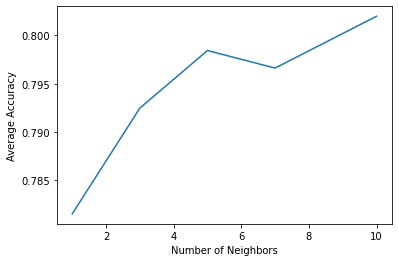

In [30]:
#knn plot
plt.plot([1,3,5,7,10],avg_accuracy)
plt.xlabel("Number of Neighbors")
plt.ylabel("Average Accuracy")

In [38]:
KNN_AUC = sum(avg_accuracy)/len(avg_accuracy)
LOG_AUC = sum(log_acc)/len(log_acc)
print(KNN_AUC)
print(LOG_AUC)

0.7942033333333334
0.9217000000000001


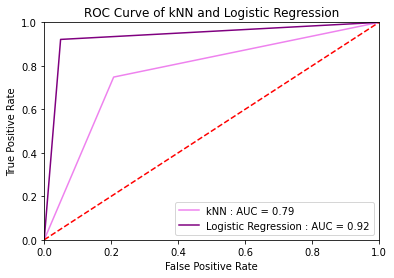

In [39]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(foldmain_train.iloc[:, :-1], foldmain_train.iloc[:, -1])
y_pred = neigh.predict(foldmain_test.iloc[:, :-1])
fpr, tpr, threshold = roc_curve(foldmain_test.iloc[:, -1], y_pred)

lr = LogisticRegression(max_iter=1000)
lr.fit(foldmain_train.iloc[:, :-1], foldmain_train.iloc[:,-1])
predicted_classes = lr.predict(foldmain_test.iloc[:, :-1])

plt.title('ROC Curve for KNN and Logistic Regression')
plt.plot(fpr, tpr, 'b', color="violet", label="kNN : AUC = 0.79")
fpr, tpr, threshold = roc_curve(foldmain_test.iloc[:, -1], predicted_classes)

plt.plot(fpr, tpr, 'b', color="purple", label="Logistic Regression : AUC = 0.92")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN and Logistic Regression')
plt.show()